<a href="https://colab.research.google.com/github/QuanRy/Machine_Learning/blob/main/lab_4/lab_4_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Бибилиотеки
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [14]:
#df = pd.read_csv("loan200.csv", delimiter=',')
df = pd.read_csv("loan3000.csv", delimiter=',')
df.head(10)

,Unnamed: 0,outcome,purpose_,dti,borrower_score,payment_inc_ratio
0,32109,paid off,debt_consolidation,21.23,0.40,5.11135
1,16982,default,credit_card,15.49,0.40,5.43165
2,25335,paid off,debt_consolidation,27.30,0.70,9.23003
3,34580,paid off,major_purchase,21.11,0.40,2.33482
4,14424,default,debt_consolidation,16.46,0.45,12.10320
5,35621,paid off,debt_consolidation,12.12,0.50,3.89391
6,9920,default,debt_consolidation,29.79,0.40,7.00390
7,42095,paid off,debt_consolidation,7.94,0.40,10.04070
8,25219,paid off,debt_consolidation,10.81,0.55,3.54972
9,26196,paid off,debt_consolidation,16.37,0.45,7.50984


In [15]:
# Удалим поле "outcome", т.к. оно текстровое
df = df.drop(['outcome', "Unnamed: 0", "purpose_"], axis=1)

In [16]:
# Удалим пустые строки 
df = df.dropna()
df.shape

(3000, 3)

In [17]:
# Сделаем копию обрпаботанных данных
copy_df = df 

In [18]:
copy_df.head(5)

,dti,borrower_score,payment_inc_ratio
0,21.23,0.40,5.11135
1,15.49,0.40,5.43165
2,27.30,0.70,9.23003
3,21.11,0.40,2.33482
4,16.46,0.45,12.10320


# Начало работы с данными

In [19]:
# borrower_score - оценка заемщика
X = copy_df.drop('borrower_score', axis=1)
y = copy_df['borrower_score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Далее, применим метод главных компонент (PCA) и построим график кумулятивной доли, объясненной дисперсии для определения количества главных компонент, которые необходимо оставить:

PCA - это техника сокращения размерности, которая проецирует набор данных из высокомерного пространства в пространство меньшей размерности, сохраняя дисперсию данных. Скоращение размерности данных облегчает их визуализацию и анализ.

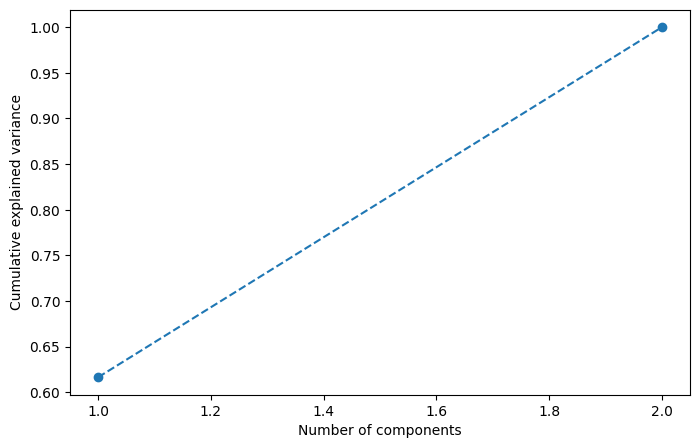

In [20]:
pca = PCA()
pca.fit(X_scaled)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

1. Далее, применим PCA с главными компонентами и выведем таблицу со значениями коэффициентов для каждого признака на каждой компоненте:

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

loadings = pd.DataFrame(pca.components_, columns=X.columns)
loadings

,dti,payment_inc_ratio
0,0.707107,0.707107
1,-0.707107,0.707107


2. Для проведения анализа главных компонент на выбранных параметрах, выберем параметры "dti" (отношение долга к доходам) и "payment_inc_ratio" (коэффициент увеличения платежа):

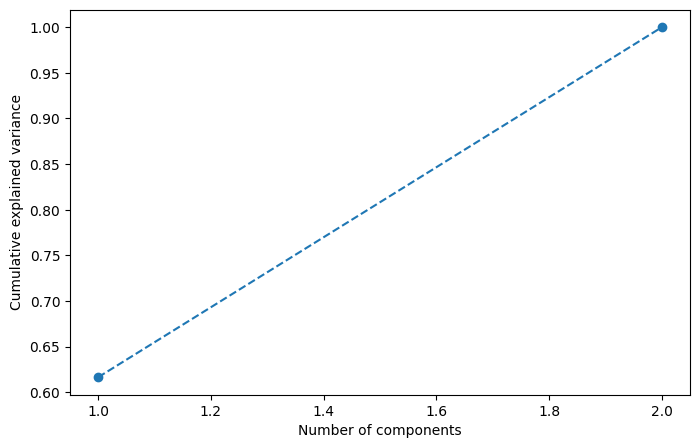

In [23]:
# "dti" - отношение долга к доходам 
# "payment_inc_ratio" - коэффициент увеличения платежа
X_2 = df[['dti', 'payment_inc_ratio']]
y = df['payment_inc_ratio']

scaler = StandardScaler()
X_2_scaled = scaler.fit_transform(X_2)

pca_2 = PCA()
pca_2.fit(X_2_scaled)

var_exp_2 = pca_2.explained_variance_ratio_
cum_var_exp_2 = np.cumsum(var_exp_2)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var_exp_2)+1), cum_var_exp_2, marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

3. Оставляем только 1 компоненту для дальнейшего анализа.

In [24]:
pca_2 = PCA(n_components=1)
X_2_pca = pca_2.fit_transform(X_2_scaled)

loadings_2 = pd.DataFrame(pca_2.components_, columns=X_2.columns)
loadings_2

,dti,payment_inc_ratio
0,0.707107,0.707107
